In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

In [3]:
means = np.array([13.503, 13.638])
stds = np.array([0.034, 0.026])

var  = stds ** 2
w_FE = 1 / var
mu_FE = (w_FE * means).sum() / w_FE.sum()

Q  = (w_FE * (means - mu_FE) ** 2).sum()
df = len(means) - 1
c  = w_FE.sum() - (w_FE ** 2).sum() / w_FE.sum()

T_squared = max(0.0, (Q - df) / c)

weights = 1 / (var + T_squared)

combined_mean = (weights * means).sum() / weights.sum()
combined_std  = np.sqrt(1 / weights.sum())

print(combined_mean, "+/-", combined_std)

13.57227777777778 +/- 0.06747658487336793


In [4]:
N_HI = 21.4

N_MgII = 16.288
sigma_MgII = 0.097
N_SiII = 16.326
sigma_SiII = 0.444
N_PII = 0
sigma_PII = 0
N_SII = 15.882
sigma_SII = 0.127
N_CrII = 13.572
sigma_CrII = 0.067
N_FeII = 15.323
sigma_FeII = 0.024
N_NiII = 13.895
sigma_NiII = 0.034
N_ZnII = 13.642
sigma_ZnII = 0.078
N_CuII = 12.866
sigma_CuII = 0.100

In [23]:
MgII_H = N_MgII - N_HI + 12
SiII_H = N_SiII - N_HI + 12
PII_H = N_PII - N_HI + 12
SII_H = N_SII - N_HI + 12
CrII_H = N_CrII - N_HI + 12
FeII_H = N_FeII - N_HI + 12
NiII_H = N_NiII - N_HI + 12
ZnII_H = N_ZnII - N_HI + 12
CuII_H = N_CuII - N_HI + 12
if N_SII != 0:
    print("S: ", SII_H, "+/-", sigma_SII)
if N_FeII != 0:
    print("Fe: ", FeII_H, "+/-", sigma_FeII)

S:  6.482000000000001 +/- 0.127
Fe:  5.923000000000002 +/- 0.024


In [6]:
MgII_H_LMC = 7.26
sigma_MgII_H_LMC = 0.08
SiII_H_LMC = 7.35
sigma_SiII_H_LMC = 0.10
PII_H_LMC = 5.10
sigma_PII_H_LMC = 0.10
SII_H_LMC = 6.94
sigma_SII_H_LMC = 0.04
CrII_H_LMC = 5.37
sigma_CrII_H_LMC = 0.07
FeII_H_LMC = 7.32
sigma_FeII_H_LMC = 0.08
NiII_H_LMC = 5.92
sigma_NiII_H_LMC = 0.07
ZnII_H_LMC = 4.31
sigma_ZnII_H_LMC = 0.15
CuII_H_LMC = 3.89
sigma_CuII_H_LMC = 0.04

In [7]:
depletion_MgII = MgII_H - MgII_H_LMC
sigma_depletion_MgII = sigma_MgII ** 2 + sigma_MgII_H_LMC ** 2
depletion_SiII = SiII_H - SiII_H_LMC
sigma_depletion_SiII = sigma_SiII ** 2 + sigma_SiII_H_LMC ** 2
depletion_PII = PII_H - PII_H_LMC
sigma_depletion_PII = sigma_PII ** 2 + sigma_PII_H_LMC ** 2
depletion_SII = SII_H - SII_H_LMC
sigma_depletion_SII = sigma_SII ** 2 + sigma_SII_H_LMC ** 2
depletion_CrII = CrII_H - CrII_H_LMC
sigma_depletion_CrII = sigma_CrII ** 2 + sigma_CrII_H_LMC ** 2
depletion_FeII = FeII_H - FeII_H_LMC
sigma_depletion_FeII = sigma_FeII ** 2 + sigma_FeII_H_LMC ** 2
depletion_NiII = NiII_H - NiII_H_LMC
sigma_depletion_NiII = sigma_NiII ** 2 + sigma_NiII_H_LMC ** 2
depletion_ZnII = ZnII_H - ZnII_H_LMC
sigma_depletion_ZnII = sigma_ZnII ** 2 + sigma_ZnII_H_LMC ** 2
depletion_CuII = CuII_H - CuII_H_LMC
sigma_depletion_CuII = sigma_CuII ** 2 + sigma_CuII_H_LMC ** 2

In [8]:
A_MgII = -0.60
sigma_A_MgII = 0.11
B_MgII = -0.50
sigma_B_MgII = 0.02
z_MgII = 0.407
F_star_MgII = (depletion_MgII - B_MgII) / A_MgII + z_MgII
sigma_F_star_MgII = np.sqrt((sigma_depletion_MgII / A_MgII) ** 2 + (sigma_B_MgII / A_MgII) ** 2 + ((depletion_MgII - B_MgII) * sigma_A_MgII / A_MgII ** 2) ** 2)

A_SiII = -1.11
sigma_A_SiII = 0.12
B_SiII = -0.68
sigma_B_SiII = 0.03
z_SiII = 0.247
F_star_SiII = (depletion_SiII - B_SiII) / A_SiII + z_SiII
sigma_F_star_SiII = np.sqrt((sigma_depletion_SiII / A_SiII) ** 2 + (sigma_B_SiII / A_SiII) ** 2 + ((depletion_SiII - B_SiII) * sigma_A_SiII / A_SiII ** 2) ** 2)

A_PII = -1
sigma_A_PII = 0
B_PII = -1
sigma_B_PII = 0
z_PII = 1
F_star_PII = (depletion_PII - B_PII) / A_PII + z_PII
sigma_F_star_PII  = np.sqrt((sigma_depletion_PII  / A_PII ) ** 2 + (sigma_B_PII  / A_PII ) ** 2 + ((depletion_PII  - B_PII ) * sigma_A_PII  / A_PII  ** 2) ** 2)

A_SII = -1.02
sigma_A_SII = 0.10
B_SII = -0.31
sigma_B_SII = 0.02
z_SII = 0.137
F_star_SII = (depletion_SII - B_SII) / A_SII + z_SII
sigma_F_star_SII  = np.sqrt((sigma_depletion_SII  / A_SII ) ** 2 + (sigma_B_SII  / A_SII ) ** 2 + ((depletion_SII  - B_SII ) * sigma_A_SII  / A_SII  ** 2) ** 2)

A_CrII = -1.18
sigma_A_CrII = 0.08
B_CrII = -1.13
sigma_B_CrII = 0.02
z_CrII = 0.368
F_star_CrII = (depletion_CrII - B_CrII) / A_CrII + z_CrII
sigma_F_star_CrII = np.sqrt((sigma_depletion_CrII / A_CrII) ** 2 + (sigma_B_CrII / A_CrII) ** 2 + ((depletion_CrII - B_CrII) * sigma_A_CrII / A_CrII ** 2) ** 2)

A_FeII = -1.285
sigma_A_FeII = 0.044
B_FeII = -1.513
sigma_B_FeII = 0.033
z_FeII = 0.437
F_star_FeII = (depletion_FeII - B_FeII) / A_FeII + z_FeII
sigma_F_star_FeII = np.sqrt((sigma_depletion_FeII / A_FeII) ** 2 + (sigma_B_FeII / A_FeII) ** 2 + ((depletion_FeII - B_FeII) * sigma_A_FeII / A_FeII ** 2) ** 2)

A_NiII = -1.29
sigma_A_NiII = 0.08
B_NiII = -1.16
sigma_B_NiII = 0.02
z_NiII = 0.338
F_star_NiII = (depletion_NiII - B_NiII) / A_NiII + z_NiII
sigma_F_star_NiII = np.sqrt((sigma_depletion_NiII / A_NiII) ** 2 + (sigma_B_NiII / A_NiII) ** 2 + ((depletion_NiII - B_NiII) * sigma_A_NiII / A_NiII ** 2) ** 2)

A_ZnII = -0.73
sigma_A_ZnII = 0.07
B_ZnII = -0.36
sigma_B_ZnII = 0.02
z_ZnII = 0.358
F_star_ZnII = (depletion_ZnII - B_ZnII) / A_ZnII + z_ZnII
sigma_F_star_ZnII = np.sqrt((sigma_depletion_ZnII / A_ZnII) ** 2 + (sigma_B_ZnII / A_ZnII) ** 2 + ((depletion_ZnII - B_ZnII) * sigma_A_ZnII / A_ZnII ** 2) ** 2)

A_CuII = -1.15
sigma_A_CuII = 0.42
B_CuII = -0.44
sigma_B_CuII = 0.09
z_CuII = 0.325
F_star_CuII = (depletion_CuII - B_CuII) / A_CuII + z_CuII
sigma_F_star_CuII = np.sqrt((sigma_depletion_CuII / A_CuII) ** 2 + (sigma_B_CuII / A_CuII) ** 2 + ((depletion_CuII - B_CuII) * sigma_A_CuII / A_CuII ** 2) ** 2)

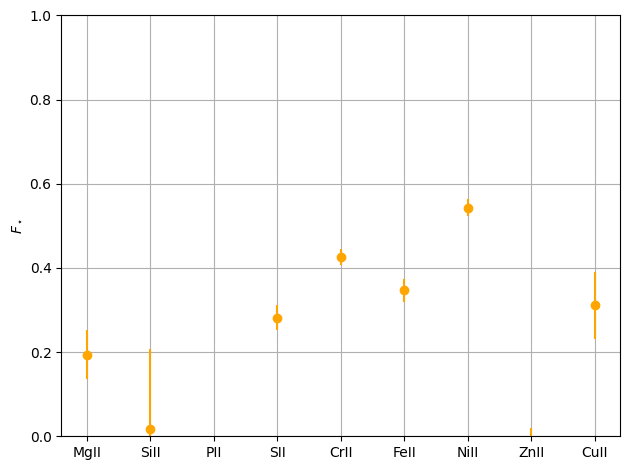

In [9]:
F_stars = np.array([F_star_MgII, F_star_SiII, F_star_PII, F_star_SII, F_star_CrII, F_star_FeII, F_star_NiII, F_star_ZnII, F_star_CuII])
sigma_F_stars = np.array([sigma_F_star_MgII, sigma_F_star_SiII, sigma_F_star_PII, sigma_F_star_SII, sigma_F_star_CrII, sigma_F_star_FeII, sigma_F_star_NiII, sigma_F_star_ZnII, sigma_F_star_CuII])
labels = ['MgII', 'SiII', 'PII', 'SII', 'CrII', 'FeII', 'NiII', 'ZnII', 'CuII']

x = np.arange(9)

plt.errorbar(x, F_stars, fmt = 'o', yerr = sigma_F_stars, color = 'orange')
plt.ylim(0, 1)
plt.xticks(x, labels)
plt.ylabel(r'$F_\star$')
plt.grid()
plt.tight_layout()

plt.show()

# MgII always underestimates F* using Jenkins
# NiII, FeII, CrII are better measured lines
# PII, SII have no data for LMC-LH-3120
# CuII had a suboptimal voigt showing
# SiII based on extremely noisy profile

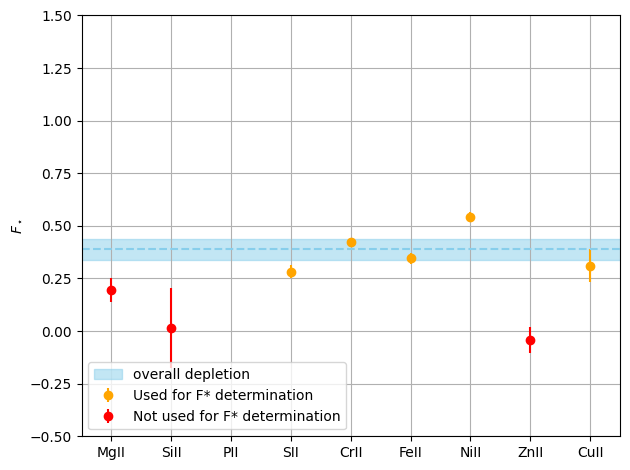

In [24]:
good = ['SII', 'CrII', 'FeII', 'NiII', 'CuII']
good_mask = np.isin(labels, good)
valid_F_stars = F_stars[good_mask]
valid_sigma_F_stars = sigma_F_stars[good_mask]

var  = valid_sigma_F_stars ** 2
w_FE = 1 / var
mu_FE = (w_FE * valid_F_stars).sum() / w_FE.sum()

Q  = (w_FE * (valid_F_stars - mu_FE) ** 2).sum()
df = len(valid_F_stars) - 1
c  = w_FE.sum() - (w_FE ** 2).sum() / w_FE.sum()

T_squared = max(0.0, (Q - df) / c)

weights = 1 / (var + T_squared)

F_star = (weights * valid_F_stars).sum() / weights.sum()
sigma_F_star  = np.sqrt(1 / weights.sum())

plt.errorbar(x[good_mask], F_stars[good_mask], fmt = 'o', yerr = sigma_F_stars[good_mask], color = 'orange', label = 'Used for F* determination')
plt.errorbar(x[~good_mask], F_stars[~good_mask], fmt = 'o', yerr = sigma_F_stars[~good_mask], color = 'red', label = 'Not used for F* determination')

plt.fill_between([-1, 10], F_star - sigma_F_star, F_star + sigma_F_star, color = 'skyblue', alpha = 0.5, label = 'overall depletion')
plt.axhline(F_star, color = 'skyblue', linestyle = '--')

plt.xlim(-0.5, 8.5)
plt.ylim(-0.5, 1.5)
plt.xticks(x, labels)
plt.ylabel(r'$F_\star$')
plt.grid()
plt.tight_layout()
plt.legend()

plt.show()

In [20]:
A_OI = -0.225
sigma_A_OI = 0.053
B_OI = -0.145
sigma_B_OI = 0.051
z_OI = 0.598

depletion_OI = B_OI + A_OI * (F_star - z_OI)
sigma_depletion_OI = np.sqrt(sigma_B_OI ** 2 + ((F_star - z_OI) * sigma_A_OI) ** 2 + (A_OI * sigma_F_star) ** 2)

OI_H_LMC = 8.50 # this is okay cause we are always using photospheric abundances
sigma_OI_H_LMC = 0.14

OI_H = OI_H_LMC + depletion_OI
sigma_OI_H = np.sqrt(sigma_OI_H_LMC ** 2 + sigma_depletion_OI ** 2)

print(OI_H, "+/-", sigma_OI_H)

8.402238692009025 +/- 0.14983482607784693


In [22]:
# OI_H_HII = 8.39
# sigma_OI_H_HII = 0.02

# z_score = np.abs(OI_H - OI_H_HII) / np.sqrt(sigma_OI_H ** 2 + sigma_OI_H_HII ** 2)

# p_value = 2 * (1 - norm.cdf(abs(z_score)))
# print(p_value)

In [12]:
# END